## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
img = cv2.imread('elephant.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

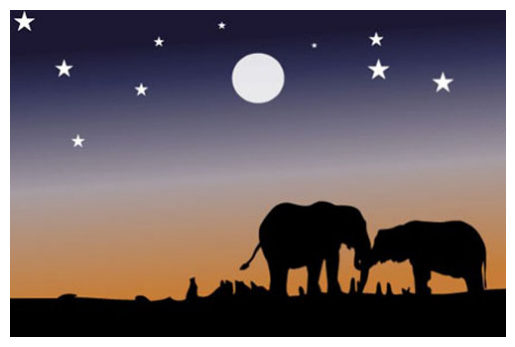

In [7]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
img.shape

(330, 500, 3)

In [9]:
# Flatten Each channel of the Image
all_pixels  = img.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [10]:
from sklearn.cluster import KMeans

In [37]:
dominant_colors = 10

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)


KMeans(n_clusters=10)

In [38]:
centers = km.cluster_centers_

In [39]:
centers

array([[ 54.68687138,  54.90694731,  89.24865117],
       [163.47183941, 149.65566493, 151.96934955],
       [  1.3573131 ,   0.75767353,   1.10054063],
       [192.80687549, 129.22494495,  71.72355991],
       [232.99100787, 232.68340202, 236.93106032],
       [ 90.77135348,  88.42352168, 114.11563732],
       [ 31.02914116,  27.65228036,  55.18456071],
       [180.16007126, 142.44445858, 115.62927853],
       [105.60780985,  70.63497453,  41.84295416],
       [125.12834915, 119.34443799, 137.31687004]])

In [40]:
centers = np.array(centers,dtype='uint8')

In [41]:
print(centers)

[[ 54  54  89]
 [163 149 151]
 [  1   0   1]
 [192 129  71]
 [232 232 236]
 [ 90  88 114]
 [ 31  27  55]
 [180 142 115]
 [105  70  41]
 [125 119 137]]


### Plot what all colors are these ?

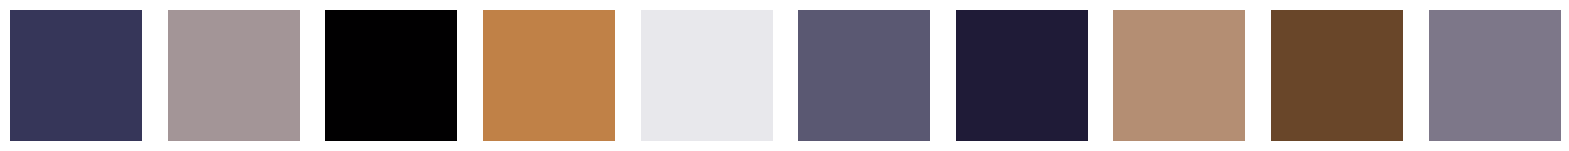

In [42]:
plt.figure(figsize=(centers.shape[0]*2,2))

i = 1

for center in centers:
    plt.subplot(1,centers.shape[0],i)
    i += 1
    na = np.zeros(shape=(100,100,3),dtype='uint8')
    na[:,:,:] = center
    plt.axis('off')
    plt.imshow(na)

plt.show()

## Segmenting Our Original Image

In [43]:
new_img = np.zeros((330*500,3),dtype='uint8')

print(new_img.shape)


(165000, 3)


In [44]:
centers

array([[ 54,  54,  89],
       [163, 149, 151],
       [  1,   0,   1],
       [192, 129,  71],
       [232, 232, 236],
       [ 90,  88, 114],
       [ 31,  27,  55],
       [180, 142, 115],
       [105,  70,  41],
       [125, 119, 137]], dtype=uint8)

In [45]:
km.labels_

array([6, 6, 6, ..., 2, 2, 2])

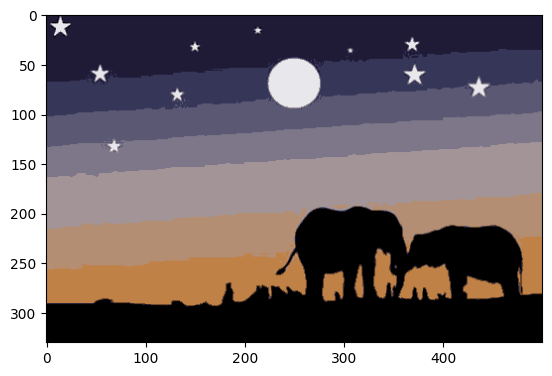

In [46]:

for ix in range(new_img.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]
    
new_img = new_img.reshape((img.shape))
plt.imshow(new_img)
plt.show()
    
    
